In [ ]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data
bat_df = pd.read_csv('/content/batting_summary.csv')
bowl_df = pd.read_csv('/content/bowling_summary.csv')
match_df = pd.read_csv('/content/match_summary.csv')

#EDA on batting data

In [ ]:
#top 5 rows
bat_df.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.3
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.5
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.3
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.7


In [ ]:
#getting info about data
bat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_no          876 non-null    int64  
 1   Match_Between     876 non-null    object 
 2   Team_Innings      876 non-null    object 
 3   Batsman_Name      876 non-null    object 
 4   Batting_Position  876 non-null    int64  
 5   Dismissal         876 non-null    object 
 6   Runs              876 non-null    int64  
 7   Balls             876 non-null    int64  
 8   4s                876 non-null    int64  
 9   6s                876 non-null    int64  
 10  Strike_Rate       876 non-null    float64
dtypes: float64(1), int64(6), object(4)
memory usage: 75.4+ KB


In [ ]:
#checking null values
bat_df.isnull().sum()

Match_no            0
Match_Between       0
Team_Innings        0
Batsman_Name        0
Batting_Position    0
Dismissal           0
Runs                0
Balls               0
4s                  0
6s                  0
Strike_Rate         0
dtype: int64

In [ ]:
#getting statistical measures
bat_df.describe()

,Match_no,Batting_Position,Runs,Balls,4s,6s,Strike_Rate
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,24.494292,5.391553,26.743151,29.055936,2.555936,0.735160,82.679758
std,13.778782,3.039304,31.014305,28.580878,3.147472,1.489988,53.150177
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.000000,5.000000,8.000000,0.000000,0.000000,50.000000
50%,25.000000,5.000000,15.000000,19.000000,1.000000,0.000000,80.217500
75%,36.250000,8.000000,39.000000,40.250000,4.000000,1.000000,106.667000
max,48.000000,11.000000,201.000000,143.000000,21.000000,11.000000,600.000000


In [ ]:
#top 10 run scorers
bat_df.groupby(['Batsman_Name'])['Runs'].sum().sort_values(ascending = False).head(10)

Batsman_Name
Virat Kohli              765
Rohit Sharma             597
Quinton de Kock          594
Rachin Ravindra          578
Daryl Mitchell           552
David Warner             535
Shreyas Iyer             530
KL Rahul                 452
Rassie van der Dussen    448
Mitchell Marsh           441
Name: Runs, dtype: int64

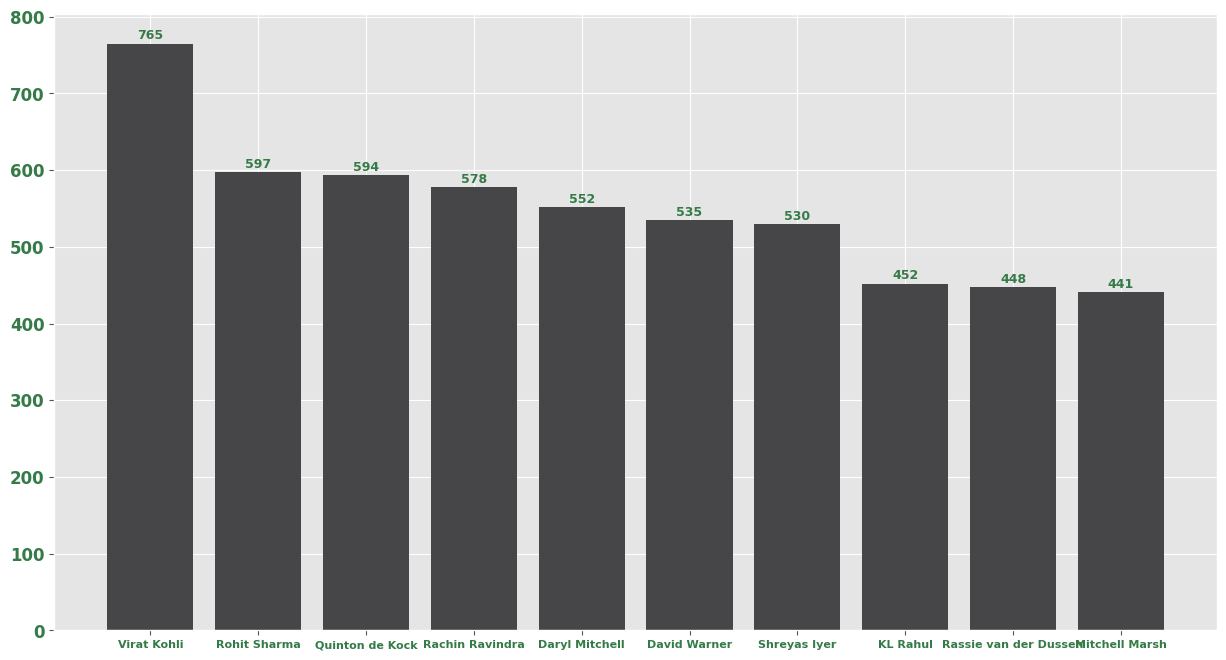

In [ ]:
#showing visualization of top 10 run scorers
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
top_scorers = bat_df.groupby(['Batsman_Name'])['Runs'].sum().sort_values(ascending = False).reset_index().head(10)
barplot = plt.bar(top_scorers['Batsman_Name'],top_scorers['Runs'],color=['#464648'])
plt.bar_label(barplot,label_type='edge',padding=1,fontsize=9,color='#347B47',fontweight='bold')
plt.xticks(fontsize=8,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.show()

In [ ]:
#creating a new column out or not out
bat_df['out/notout'] = ['notout' if (x=='Retired Hurt (Not Out)' or x=='not out') else 'out' for x in bat_df['Dismissal']]

In [ ]:
bat_df.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,out/notout
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3,out
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.3,out
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.5,out
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.3,out
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.7,out


In [ ]:
#top 10 players with most average
count_dismissal = bat_df[bat_df['out/notout'] == 'out'].groupby('Batsman_Name')['out/notout'].count()
total_runs = bat_df.groupby('Batsman_Name')['Runs'].sum()
merge_df = pd.merge(total_runs,count_dismissal,on='Batsman_Name',how='left')
merge_df['Average'] = round((merge_df['Runs'] / merge_df['out/notout']),2)
merge_df['Average'].sort_values(ascending = False).head(10)

Batsman_Name
Virat Kohli           95.62
Kane Williamson       85.33
KL Rahul              75.33
Fakhar Zaman          73.33
Azmatullah Omarzai    70.60
Daryl Mitchell        69.00
Glenn Maxwell         66.67
Shreyas Iyer          66.25
Mohammad Rizwan       65.83
Rachin Ravindra       64.22
Name: Average, dtype: float64

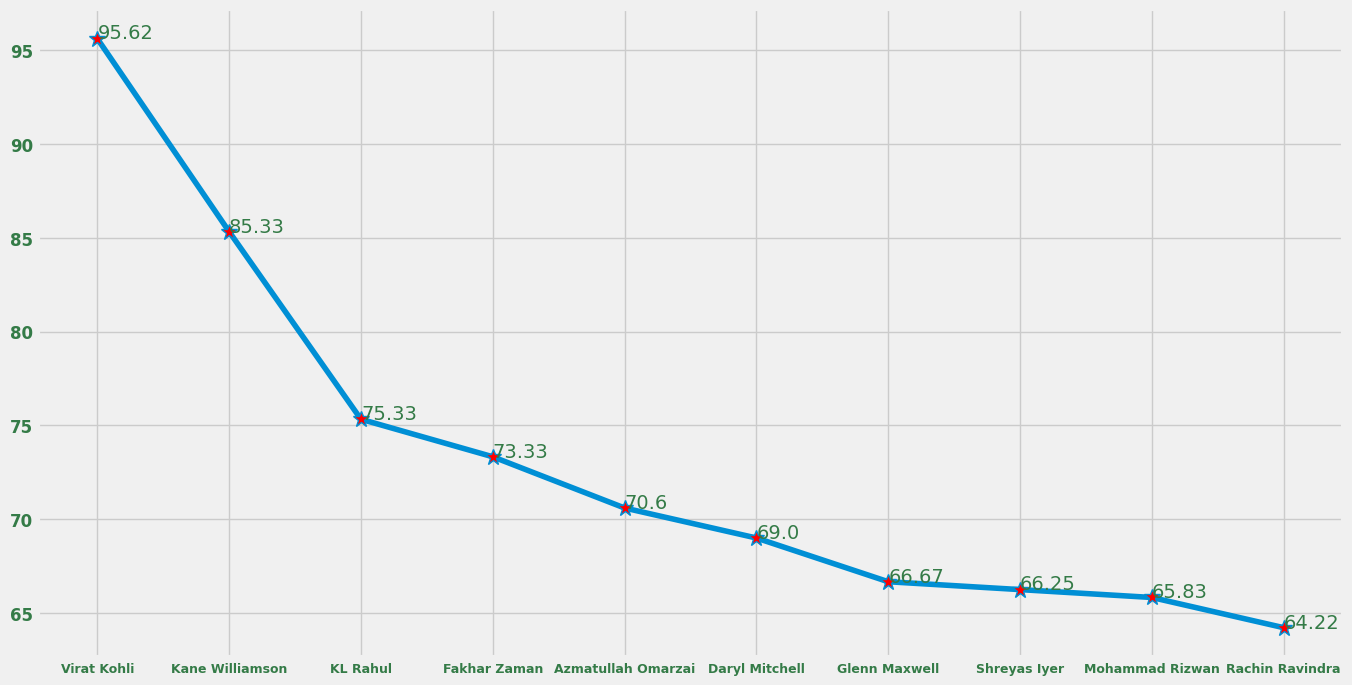

In [ ]:
#top 10 average players with visualization
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
top_10_avg = merge_df.sort_values(by='Average',ascending = False).head(10).reset_index()
plt.plot(top_10_avg['Batsman_Name'],top_10_avg['Average'],linewidth=4,marker='*',ms=12,mfc='r',label = top_10_avg['Average'])
plt.xticks(fontsize=9,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
for index,row in top_10_avg.iterrows():
  plt.text(index,row['Average'],str(row['Average']),color='#347B47')
plt.show()

In [ ]:
#top 10 strike rates
balls_faced = bat_df.groupby('Batsman_Name')['Balls'].sum()
df = pd.merge(total_runs,balls_faced,on='Batsman_Name',how='left')
df['sr'] =  round(((df['Runs'] / df['Balls']) * 100),2)
df[df['Balls'] > 100].sort_values(by='sr',ascending = False).head(10)

,Runs,Balls,sr
Batsman_Name,,,
Glenn Maxwell,400,266,150.38
Heinrich Klaasen,373,280,133.21
Travis Head,329,258,127.52
Rohit Sharma,597,474,125.95
Fakhar Zaman,220,179,122.91
Iftikhar Ahmed,142,123,115.45
Kusal Mendis,294,258,113.95
Shreyas Iyer,530,468,113.25
Harry Brook,169,150,112.67


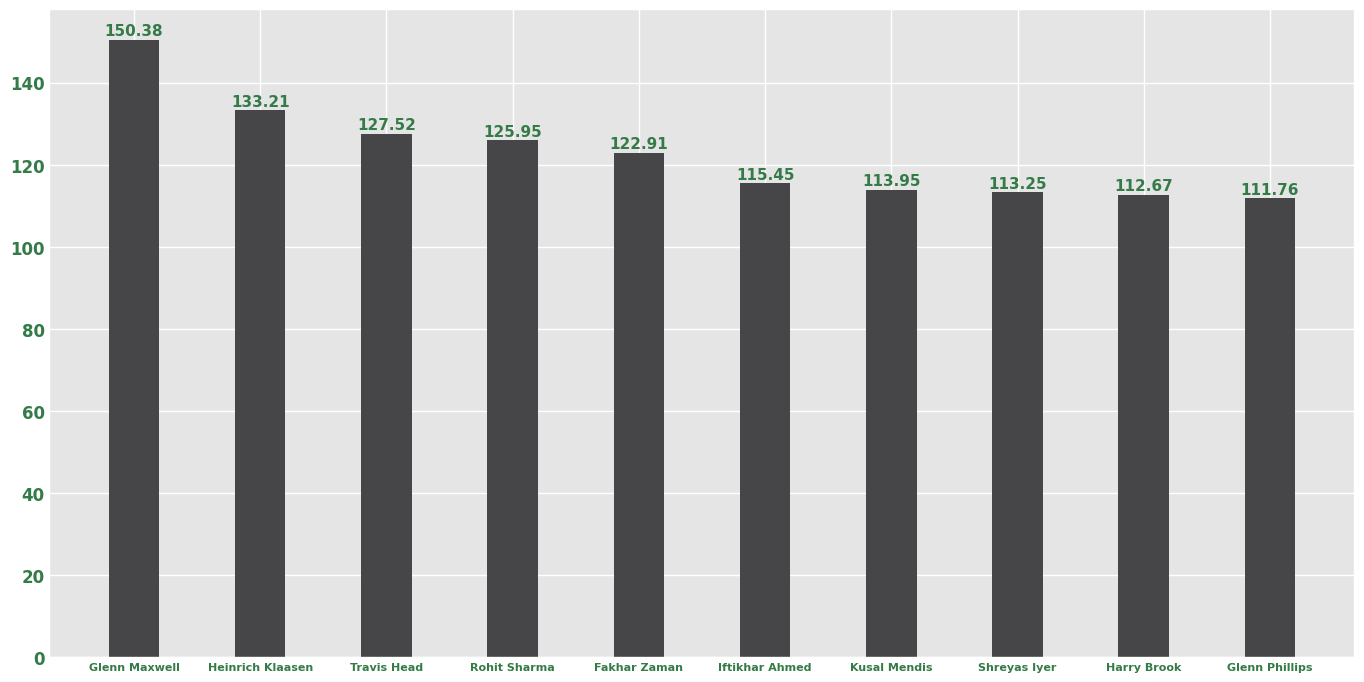

In [ ]:
#top 10 strike rates using visualization
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
top_10_strike_rate = df[df['Balls'] > 100].sort_values(by='sr',ascending = False).head(10).reset_index()
barplot = plt.bar(top_10_strike_rate['Batsman_Name'],top_10_strike_rate['sr'],color='#464648',width =0.4)
plt.bar_label(barplot,label_type='edge',padding=1,fontsize=11,color='#347B47',fontweight='bold')
plt.xticks(fontsize=8,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.show()

In [ ]:
# 50s count
bat_df[(bat_df['Runs'] >= 50) & (bat_df['Runs'] < 100)].groupby('Batsman_Name')['Runs'].count().sort_values(ascending = False).head(5)

Batsman_Name
Virat Kohli             6
Shubman Gill            4
Pathum Nissanka         4
Babar Azam              4
Hashmatullah Shahidi    3
Name: Runs, dtype: int64

In [ ]:
#100 s count
bat_df[bat_df['Runs'] >= 100].groupby('Batsman_Name')['Runs'].count().sort_values(ascending = False).head(5)

Batsman_Name
Quinton de Kock    4
Virat Kohli        3
Rachin Ravindra    3
Travis Head        2
Shreyas Iyer       2
Name: Runs, dtype: int64

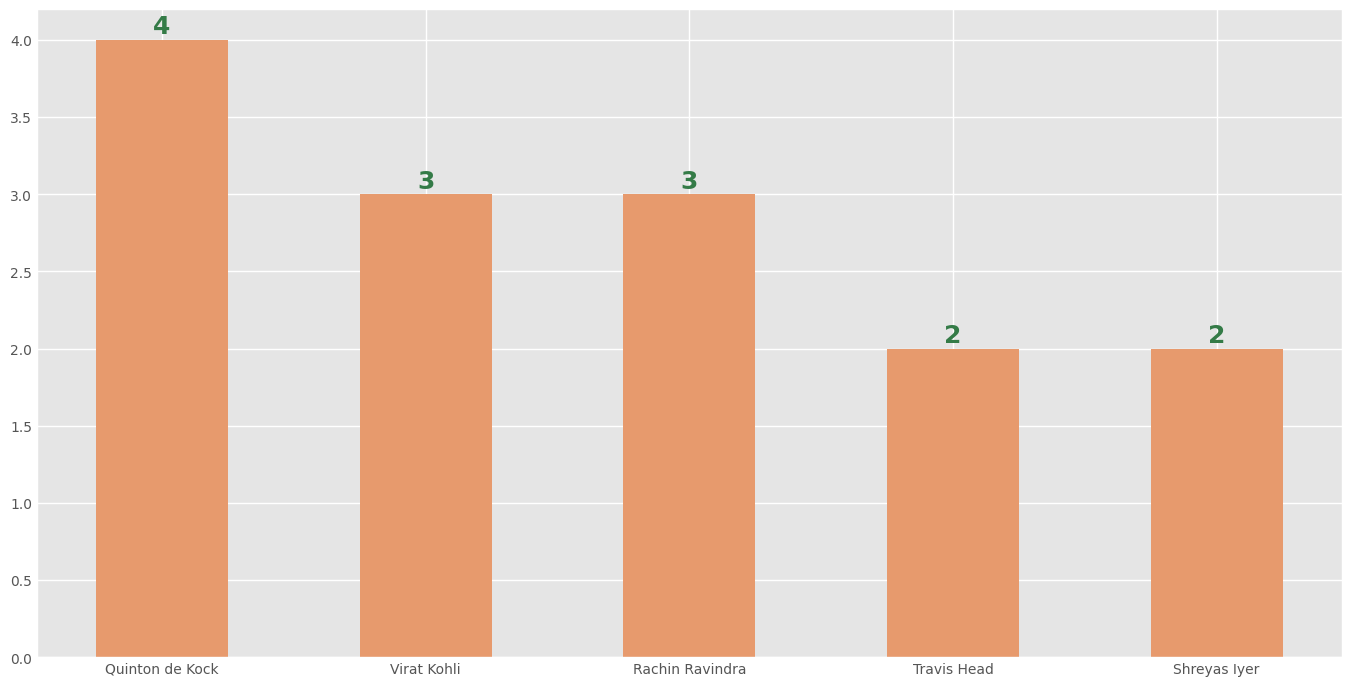

In [ ]:
#showing 100s in visualization
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
centurycount = bat_df[bat_df['Runs'] >= 100].groupby('Batsman_Name')['Runs'].count().sort_values(ascending = False).reset_index().head(5)
bar1 = plt.bar(centurycount['Batsman_Name'],centurycount['Runs'],label = '100s',color = '#E79A6D',width=0.5)
plt.bar_label(bar1,label_type='edge',padding=1,fontsize=18,color='#347B47',fontweight='bold')
plt.show()

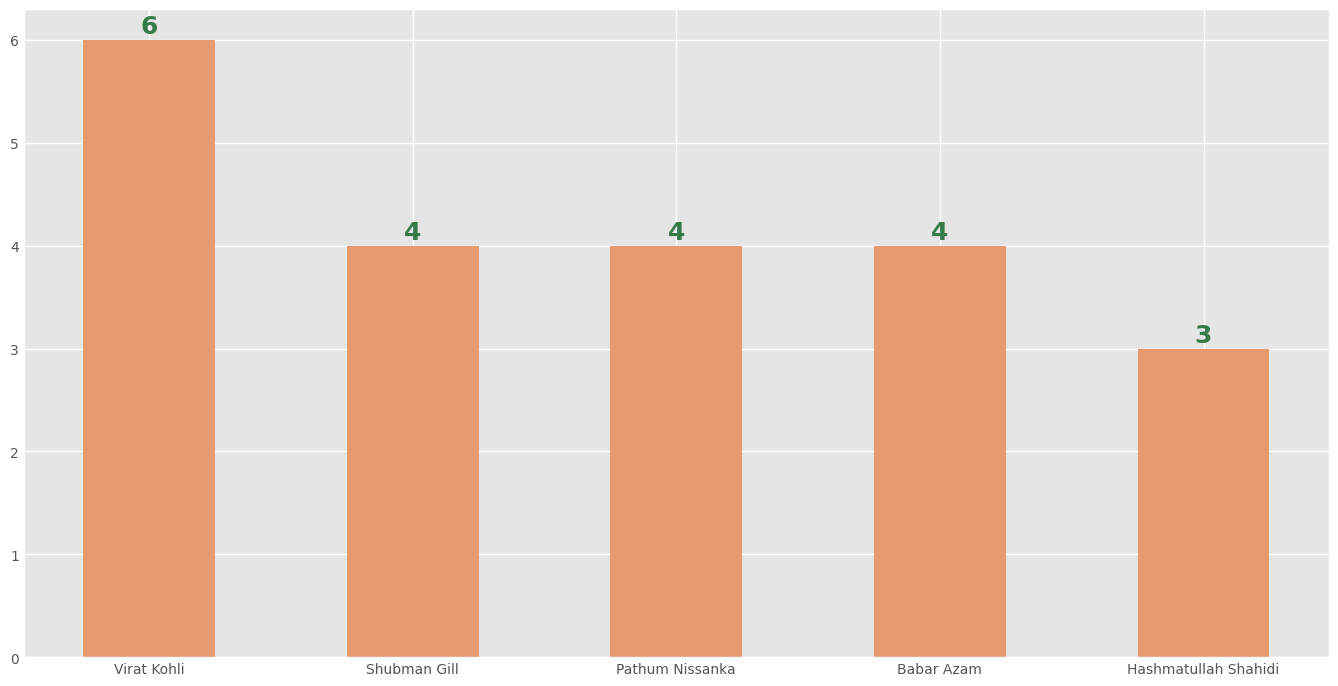

In [ ]:
#showing 50s in visualization
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
fiftycount = bat_df[(bat_df['Runs'] >= 50) & (bat_df['Runs'] < 100)].groupby('Batsman_Name')['Runs'].count().sort_values(ascending = False).reset_index().head(5)
bar1 = plt.bar(fiftycount['Batsman_Name'],fiftycount['Runs'],label = '50s',color = '#E79A6D',width=0.5)
plt.bar_label(bar1,label_type='edge',padding=1,fontsize=18,color='#347B47',fontweight='bold')
plt.show()

In [ ]:
#top 10 high scores
bat_df[['Batsman_Name','Runs']].sort_values(by='Runs',ascending = False).head(10)

,Batsman_Name,Runs
727,Glenn Maxwell,201
724,Mitchell Marsh,177
285,Quinton de Kock,174
268,David Warner,163
11,Devon Conway,152
109,Dawid Malan,140
871,Travis Head,137
851,Daryl Mitchell,134
595,Rassie van der Dussen,133
156,Rohit Sharma,131


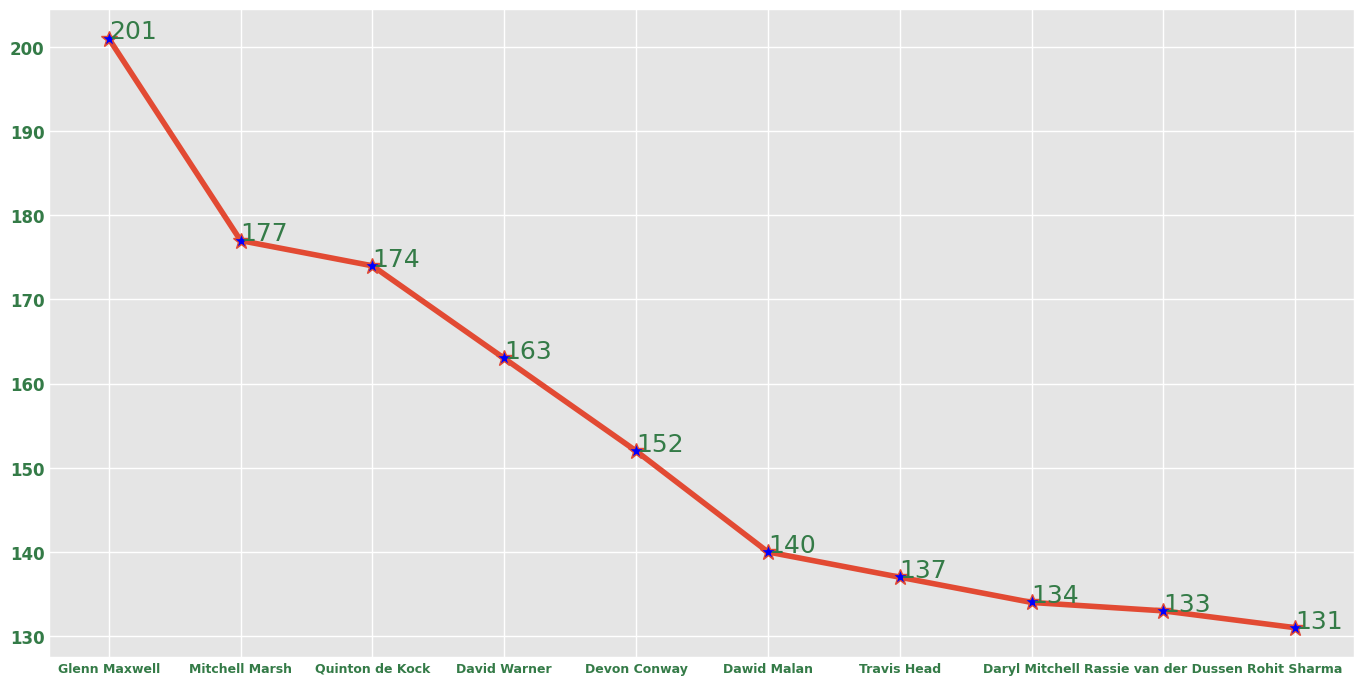

In [ ]:
#top 10 high scores through visualization
plt.figure(figsize=(15,8))
high_score = bat_df[['Batsman_Name','Runs']].sort_values(by='Runs',ascending = False).reset_index().head(10)
plt.plot(high_score['Batsman_Name'],high_score['Runs'],linewidth=4,marker='*',ms=12,mfc='b',label = high_score['Runs'])
plt.xticks(fontsize=9,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
for index,row in high_score.iterrows():
  plt.text(index,row['Runs'],str(row['Runs']),color='#347B47',fontsize=18)
plt.show()

In [ ]:
#top 5 with most sixes
bat_df.groupby('Batsman_Name')['6s'].sum().sort_values(ascending =False).head()

Batsman_Name
Rohit Sharma      31
David Warner      24
Shreyas Iyer      24
Glenn Maxwell     22
Daryl Mitchell    22
Name: 6s, dtype: int64

In [ ]:
#top 5 with most 4s
bat_df.groupby('Batsman_Name')['4s'].sum().sort_values(ascending =  False).head()

Batsman_Name
Virat Kohli        68
Rohit Sharma       66
Quinton de Kock    57
Rachin Ravindra    55
Devon Conway       54
Name: 4s, dtype: int64

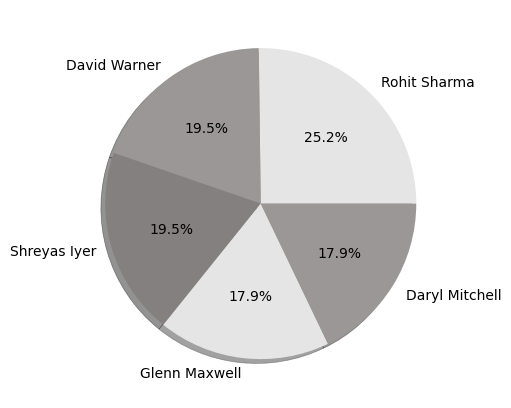

In [ ]:
#top 5 sixes using visual
top_5_6s = bat_df.groupby('Batsman_Name')['6s'].sum().sort_values(ascending =False).reset_index().head()
pieplot=plt.pie(top_5_6s['6s'],labels=top_5_6s['Batsman_Name'],autopct='%1.1f%%',
        colors=['#e6e5e5','#9b9797','#858080'],shadow=True)
plt.show()

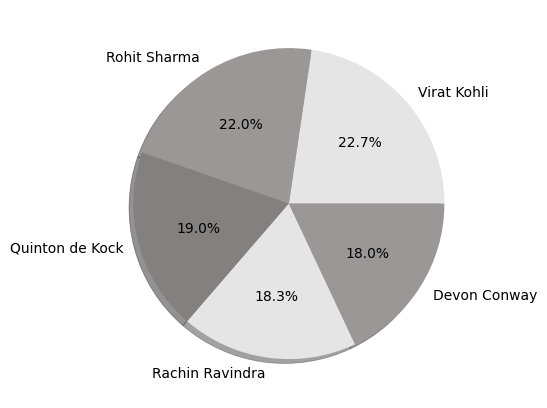

In [ ]:
#top 5 with most 4s in visual
top_5_4s = bat_df.groupby('Batsman_Name')['4s'].sum().sort_values(ascending =  False).reset_index().head()
pieplot=plt.pie(top_5_4s['4s'],labels=top_5_4s['Batsman_Name'],autopct='%1.1f%%',
        colors=['#e6e5e5','#9b9797','#858080'],shadow=True)
plt.show()

In [ ]:
#top 5 boundary percentage
#first creating runs scored through boundaries
bat_df['Boundary_runs'] = bat_df['4s'] * 4 + bat_df['6s'] * 6

In [ ]:
total_runs = bat_df.groupby('Batsman_Name')['Runs'].sum()
total_boundary_runs = bat_df.groupby('Batsman_Name')['Boundary_runs'].sum()
merge_runs = pd.merge(total_runs,total_boundary_runs,on='Batsman_Name',how='left').reset_index()
merge_runs['Boundary %'] = round(((merge_runs['Boundary_runs'] / merge_runs['Runs']) * 100),2)
merge_runs[(merge_runs['Boundary_runs'] != 0) & (merge_runs['Runs'] > 100 )].sort_values(by='Boundary %',ascending = False).head(5)

,Batsman_Name,Runs,Boundary_runs,Boundary %
113,Rohit Sharma,597,450,75.38
62,Kusal Janith Perera,149,112,75.17
31,Fakhar Zaman,220,164,74.55
131,Tanzid Hasan,144,106,73.61
34,Glenn Maxwell,400,292,73.00


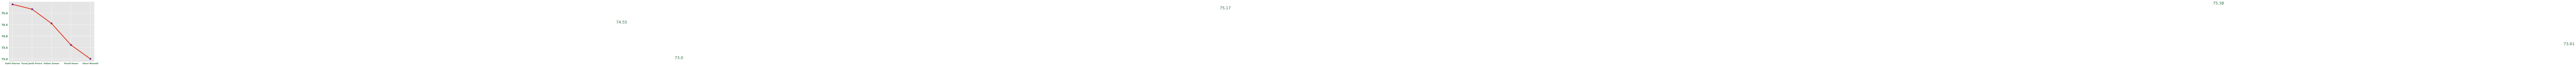

In [ ]:
#top5 boundary % using visualization
top_5_boundary = merge_runs[(merge_runs['Boundary_runs'] != 0) & (merge_runs['Runs'] > 100 )].sort_values(by='Boundary %',ascending = False).head(5)
plt.plot(top_5_boundary['Batsman_Name'],top_5_boundary['Boundary %'],linewidth=4,marker='*',ms=12,mfc='b',label = top_5_boundary['Boundary %'])
plt.xticks(fontsize=9,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
for index,row in top_5_boundary.iterrows():
  plt.text(index,row['Boundary %'],str(row['Boundary %']),color='#347B47',fontsize=18)
plt.show()

# EDA on Bowling Data

In [ ]:
bowl_df.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [ ]:
bowl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Match_no       574 non-null    int64  
 1   Match_Between  574 non-null    object 
 2   Bowling_Team   574 non-null    object 
 3   Bowler_Name    574 non-null    object 
 4   Overs          574 non-null    float64
 5   Maidens        574 non-null    int64  
 6   Runs           574 non-null    int64  
 7   Wickets        574 non-null    int64  
 8   Economy        574 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 40.5+ KB


In [ ]:
bowl_df.shape

(574, 9)

In [ ]:
bowl_df.isnull().sum()

Match_no         0
Match_Between    0
Bowling_Team     0
Bowler_Name      0
Overs            0
Maidens          0
Runs             0
Wickets          0
Economy          0
dtype: int64

In [ ]:
bowl_df.describe()

,Match_no,Overs,Maidens,Runs,Wickets,Economy
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,24.376307,7.351045,0.256098,42.322300,1.202091,5.924564
std,13.956222,2.685601,0.533933,19.651473,1.193757,2.135988
min,1.000000,0.300000,0.000000,1.000000,0.000000,1.355000
25%,12.000000,6.000000,0.000000,30.000000,0.000000,4.500000
50%,24.000000,8.000000,0.000000,41.000000,1.000000,5.670000
75%,36.000000,10.000000,0.000000,55.000000,2.000000,7.075000
max,48.000000,10.000000,3.000000,115.000000,7.000000,16.000000


In [ ]:
bowl_df[bowl_df.duplicated()]

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy


In [ ]:
#top 10 wickets
bowl_df.groupby('Bowler_Name')['Wickets'].sum().sort_values(ascending = False).head(10)

Bowler_Name
Mohammed Shami        24
Adam Zampa            23
Dilshan Madushanka    21
Jasprit Bumrah        20
Gerald Coetzee        20
Shaheen Afridi        18
Marco Jansen          17
Josh Hazlewood        16
Mitchell Starc        16
Haris Rauf            16
Name: Wickets, dtype: int64

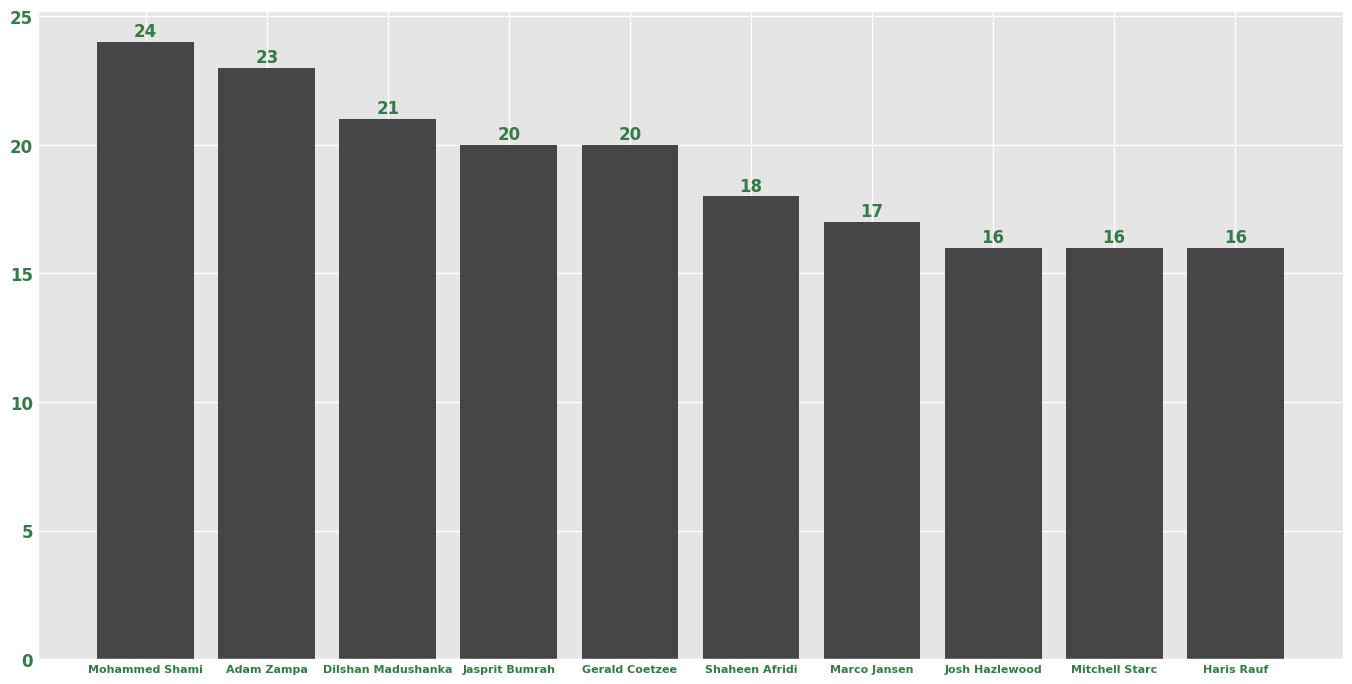

In [ ]:
#top 10 wickets using visualization
plt.figure(figsize=(15,8))
top_10_wkts = bowl_df.groupby('Bowler_Name')['Wickets'].sum().sort_values(ascending = False).reset_index().head(10)
barplot = plt.bar(top_10_wkts['Bowler_Name'],top_10_wkts['Wickets'],color=['#464648'])
plt.bar_label(barplot,label_type='edge',padding=1,fontsize=12,color='#347B47',fontweight='bold')
plt.xticks(fontsize=8,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.show()

In [ ]:
#top 10 Economy requirements
total_overs = bowl_df.groupby('Bowler_Name')['Overs'].sum()
total_runs = bowl_df.groupby('Bowler_Name')['Runs'].sum()
bowl_merge = pd.merge(total_runs,total_overs,on='Bowler_Name',how='left')
bowl_merge['Economy'] = round(bowl_merge['Runs'] / bowl_merge['Overs'],2)
print(bowl_merge)

                    Runs  Overs  Economy
Bowler_Name                             
Adam Zampa           515   96.0     5.36
Adil Rashid          413   79.4     5.20
Agha Salman           46    5.0     9.20
Aiden Markram         85   18.3     4.64
Andile Phehlukwayo    36    7.0     5.14
...                  ...    ...      ...
Travis Head          101   21.0     4.81
Trent Boult          504   91.0     5.54
Usama Mir            248   35.0     7.09
Vikramjit Singh       52    7.0     7.43
Virat Kohli           15    3.3     4.55

[102 rows x 3 columns]


In [ ]:
#top 10 Economy
bowl_merge[bowl_merge['Overs'] > 10.0].sort_values(by = 'Economy').head(10)

,Runs,Overs,Economy
Bowler_Name,,,
Jasprit Bumrah,373,91.5,4.08
Mohammad Nabi,254,61.3,4.14
Keshav Maharaj,370,89.0,4.16
Ravindra Jadeja,398,92.9,4.28
Kuldeep Yadav,424,95.1,4.46
Rashid Khan,388,86.3,4.50
Aiden Markram,85,18.3,4.64
Noor Ahmad,182,38.0,4.79
Travis Head,101,21.0,4.81


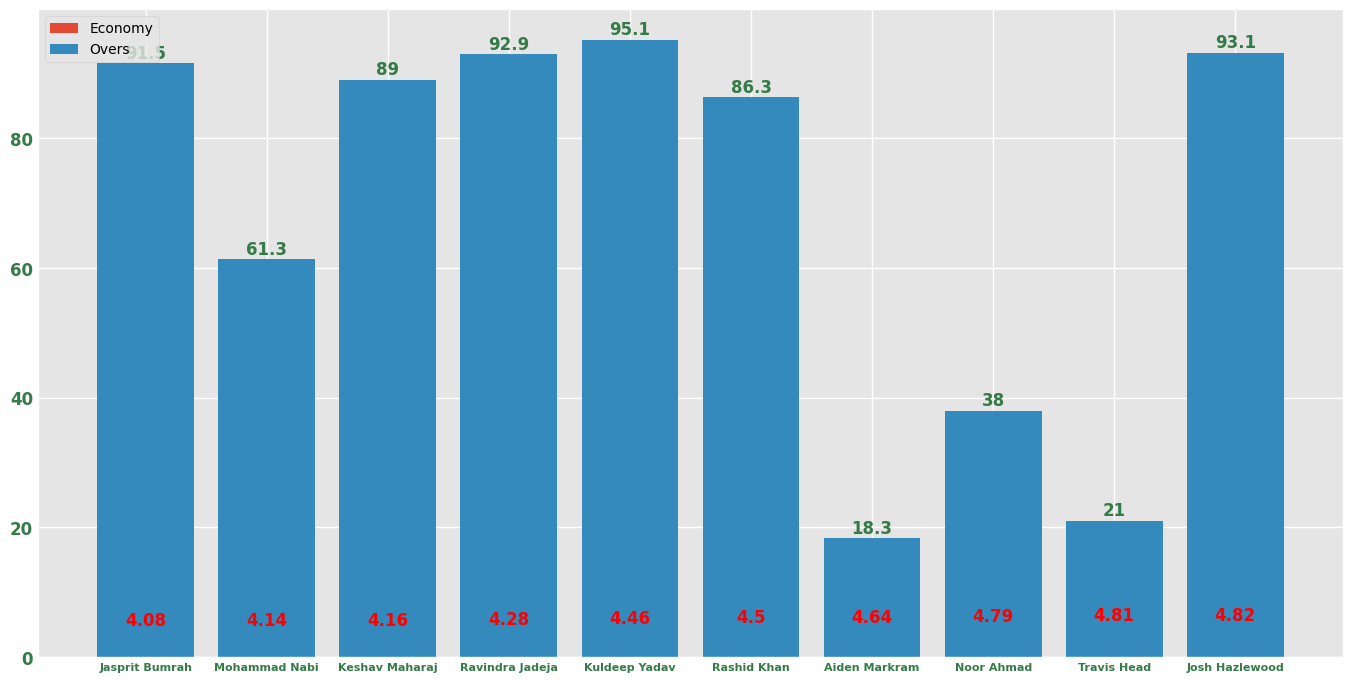

In [ ]:
#top 10 Economy
plt.figure(figsize=(15,8))
best_economy = bowl_merge[bowl_merge['Overs'] > 10.0].sort_values(by = 'Economy').reset_index().head(10)
bar1 = plt.bar(best_economy['Bowler_Name'],best_economy['Economy'],align='center',label = 'Economy')
bar2 = plt.bar(best_economy['Bowler_Name'],best_economy['Overs'],align='center',label = 'Overs')
plt.bar_label(bar1,label_type='edge',padding=1,fontsize=12,color='r',fontweight='bold')
plt.bar_label(bar2,label_type='edge',padding=1,fontsize=12,color='#347B47',fontweight='bold')
plt.xticks(fontsize=8,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.legend()
plt.show()

In [ ]:
#best 10 average
avg_merge = pd.merge(top_10_wkts,total_runs,on='Bowler_Name',how='left')
avg_merge['Average'] = round(avg_merge['Runs'] / avg_merge['Wickets'],2)
merge_avg_overs = pd.merge(avg_merge,total_overs,on='Bowler_Name',how='left')
merge_avg_overs[merge_avg_overs['Overs'] > 10.0].sort_values(by='Average').head(10)

,Bowler_Name,Wickets,Runs,Average,Overs
0,Mohammed Shami,24,257,10.71,48.5
3,Jasprit Bumrah,20,373,18.65,91.5
4,Gerald Coetzee,20,396,19.80,63.3
1,Adam Zampa,23,515,22.39,96.0
2,Dilshan Madushanka,21,525,25.00,77.8
6,Marco Jansen,17,450,26.47,68.6
5,Shaheen Afridi,18,481,26.72,81.0
7,Josh Hazlewood,16,449,28.06,93.1
8,Mitchell Starc,16,528,33.00,87.0
9,Haris Rauf,16,533,33.31,79.0


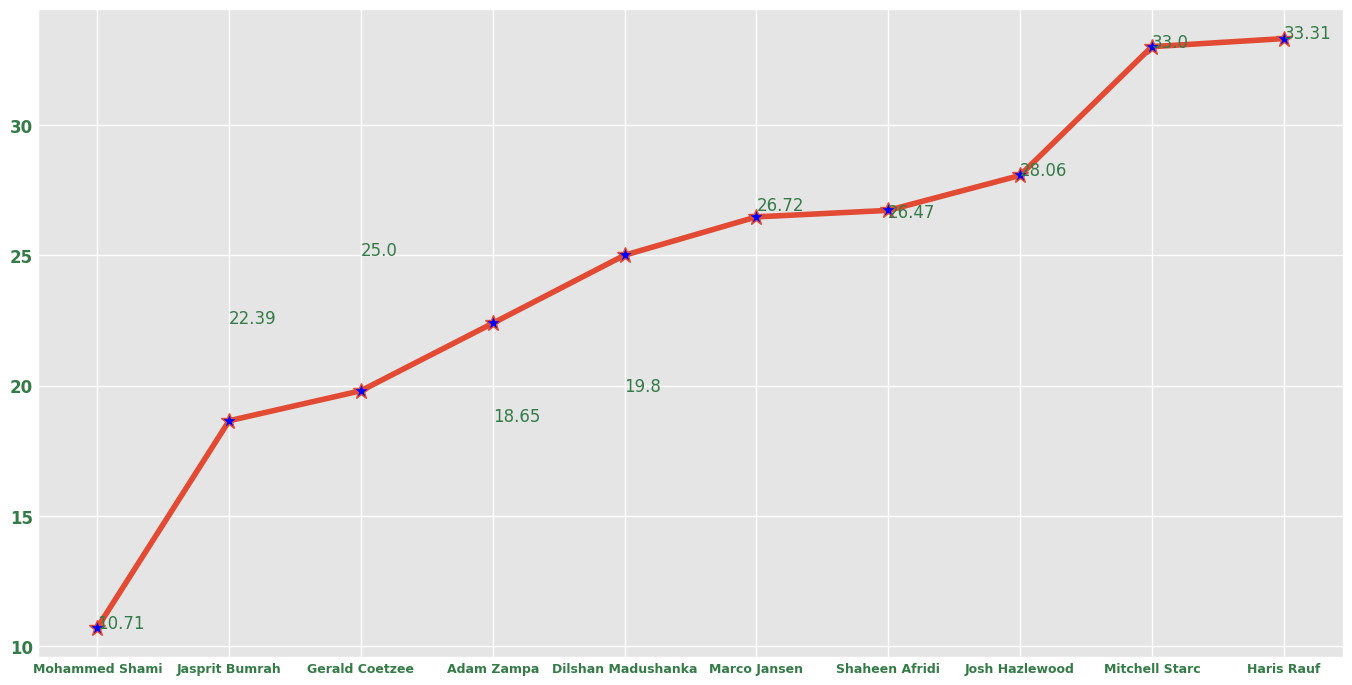

In [ ]:
#best 10 average using visualization
plt.figure(figsize=(15,8))
best_10_avg = merge_avg_overs[merge_avg_overs['Overs'] > 10.0].sort_values(by='Average').head(10)
plt.plot(best_10_avg['Bowler_Name'],best_10_avg['Average'],linewidth=4,marker='*',ms=12,mfc='b',label = best_10_avg['Average'])
plt.xticks(fontsize=9,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
for index,row in best_10_avg.iterrows():
  plt.text(index,row['Average'],str(row['Average']),color='#347B47',fontsize=12)
plt.show()
plt.show()

In [ ]:
#top 10 strike rate requirements
bowl_df['Balls'] = bowl_df['Overs'] * 6

In [ ]:
#top 10 strike rates
balls_bowled = bowl_df.groupby('Bowler_Name')['Balls'].sum()
strike_merge = pd.merge(top_10_wkts,balls_bowled,on='Bowler_Name',how='left')
strike_merge['strike_rate'] = round(strike_merge['Balls'] / strike_merge['Wickets'],2)
strike_merge.sort_values(by='strike_rate').head(10)

,Bowler_Name,Wickets,Balls,strike_rate
0,Mohammed Shami,24,291.0,12.12
4,Gerald Coetzee,20,379.8,18.99
2,Dilshan Madushanka,21,466.8,22.23
6,Marco Jansen,17,411.6,24.21
1,Adam Zampa,23,576.0,25.04
5,Shaheen Afridi,18,486.0,27.00
3,Jasprit Bumrah,20,549.0,27.45
9,Haris Rauf,16,474.0,29.62
8,Mitchell Starc,16,522.0,32.62
7,Josh Hazlewood,16,558.6,34.91


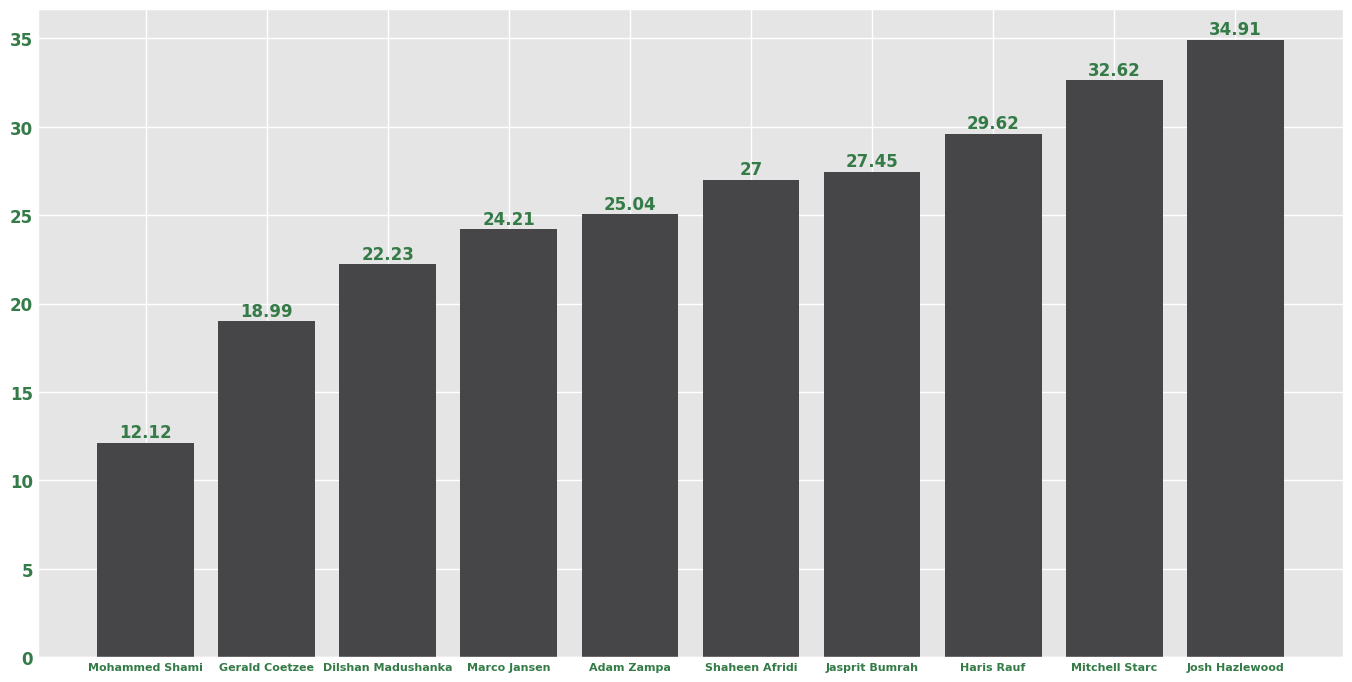

In [ ]:
#top 10 strike rates using visualization
plt.figure(figsize=(15,8))
top_10_strike_rate = strike_merge.sort_values(by='strike_rate').reset_index().head(10)
barplot = plt.bar(top_10_strike_rate['Bowler_Name'],top_10_strike_rate['strike_rate'],color=['#464648'])
plt.bar_label(barplot,label_type='edge',padding=1,fontsize=12,color='#347B47',fontweight='bold')
plt.xticks(fontsize=8,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.show()

In [ ]:
#top 5 highest wickets in a match
bowl_df[['Bowler_Name','Wickets']].sort_values('Wickets',ascending=False).head()

,Bowler_Name,Wickets
547,Mohammed Shami,7
439,Ravindra Jadeja,5
70,Mitchell Santner,5
392,Mohammed Shami,5
384,Dilshan Madushanka,5


In [ ]:
# Total maidens
bowl_df.groupby('Bowler_Name')['Maidens'].sum().sort_values(ascending = False ).head(10)

Bowler_Name
Jasprit Bumrah    9
Josh Hazlewood    8
Kagiso Rabada     7
Mohammed Siraj    6
Lungi Ngidi       6
David Willey      6
Aryan Dutt        6
Trent Boult       6
Mohammed Shami    4
Mohammad Nabi     4
Name: Maidens, dtype: int64

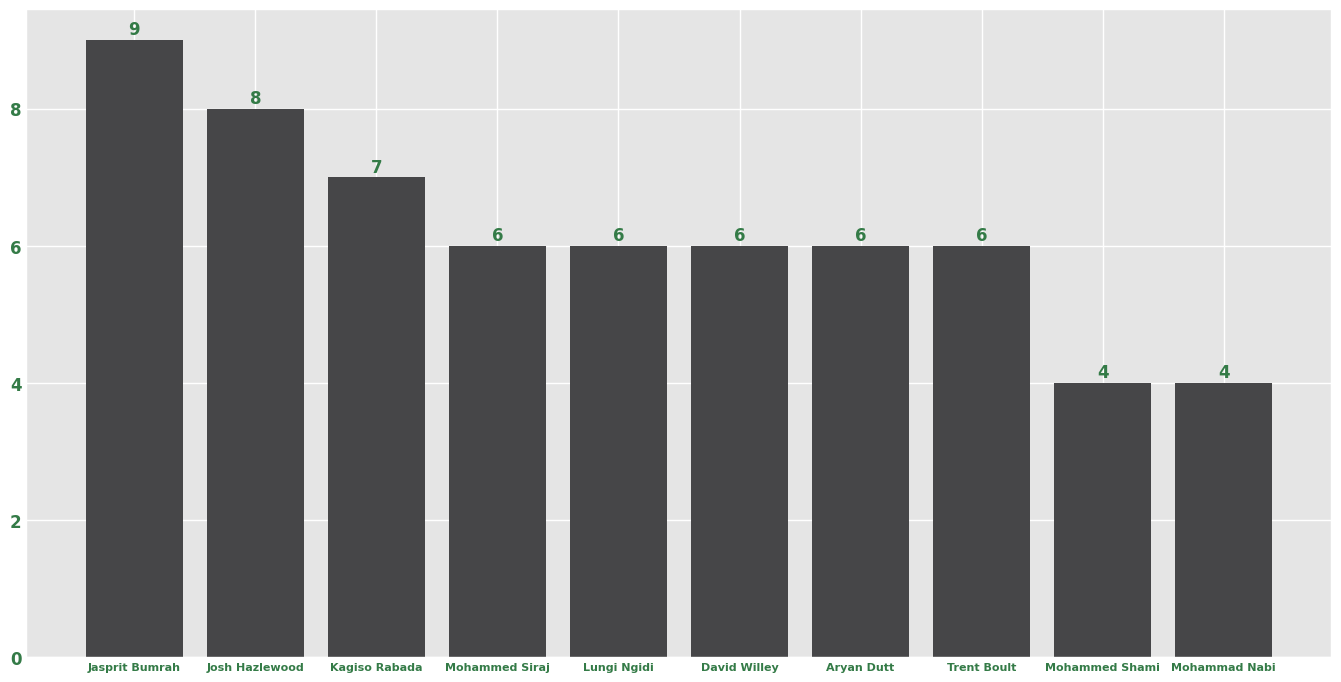

In [ ]:
# Total maidens using visualization
plt.figure(figsize=(15,8))
maiden_count = bowl_df.groupby('Bowler_Name')['Maidens'].sum().sort_values(ascending = False ).reset_index().head(10)
barplot = plt.bar(maiden_count['Bowler_Name'],maiden_count['Maidens'],color = ['#464648'])
plt.bar_label(barplot,label_type='edge',padding=1,fontsize=12,color='#347B47',fontweight='bold')
plt.xticks(fontsize=8,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.show()

# EDA on match data

In [ ]:
match_df.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,1,05-10-2023,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,06-10-2023,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,07-10-2023,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,07-10-2023,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,08-10-2023,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


In [ ]:
#dropping scorecard url
match_df = match_df.drop('Scorecard URL' , axis = 1)

In [ ]:
match_df.head()

,Match_no,Date,Venue,Team1,Team2,Winner
0,1,05-10-2023,Ahmedabad,England,New Zealand,New Zealand
1,2,06-10-2023,Hyderabad,Pakistan,Netherlands,Pakistan
2,3,07-10-2023,Dharamsala,Bangladesh,Afghanistan,Bangladesh
3,4,07-10-2023,Delhi,South Africa,Sri Lanka,South Africa
4,5,08-10-2023,Chennai,India,Australia,India


In [ ]:
#info about match data
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Match_no  48 non-null     int64 
 1   Date      48 non-null     object
 2   Venue     48 non-null     object
 3   Team1     48 non-null     object
 4   Team2     48 non-null     object
 5   Winner    48 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.4+ KB


In [ ]:
#checking null values
match_df.isnull().sum()

Match_no    0
Date        0
Venue       0
Team1       0
Team2       0
Winner      0
dtype: int64

In [ ]:
match_df.describe()

,Match_no
count,48.00
mean,24.50
std,14.00
min,1.00
25%,12.75
50%,24.50
75%,36.25
max,48.00


In [ ]:
#trim the team1 and team2 column
#trim the team1 and team2 column
match_df['Team1'] = match_df['Team1'].apply(lambda x: x.strip() if isinstance(x, str) else x)
match_df['Team2'] = match_df['Team2'].apply(lambda x: x.strip() if isinstance(x, str) else x)
match_df['Winner'] = match_df['Winner'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
#matches played by team
# Count frequency of each team in team1 and team2
team1_count = match_df['Team1'].value_counts().reset_index()
team2_count = match_df['Team2'].value_counts().reset_index()

# Rename columns for merging
team1_count.columns = ['team', 'team1_count']
team2_count.columns = ['team', 'team2_count']

# Merge counts on team
total_matches = pd.merge(team1_count, team2_count, on='team', how='outer').fillna(0)
# Calculate total matches played by each team
total_matches['total_matches'] = total_matches['team1_count'] + total_matches['team2_count'].astype(int)
matches_played = total_matches.groupby('team')['total_matches'].sum().reset_index()
print(matches_played)

           team  total_matches
0   Afghanistan            9.0
1     Australia           11.0
2    Bangladesh            9.0
3       England            9.0
4         India           11.0
5   Netherlands            9.0
6   New Zealand           10.0
7      Pakistan            9.0
8  South Africa           10.0
9     Sri Lanka            9.0


In [ ]:
#showing total matches played,won,lost by each team
win_count = match_df['Winner'].value_counts().reset_index()
win_count = win_count.rename(columns = {'Winner' : 'team'})
merge_lost = pd.merge(matches_played,win_count,on='team',how='left')
merge_lost['lost'] = merge_lost['total_matches'] - merge_lost['count']
print(merge_lost)

           team  total_matches  count  lost
0   Afghanistan            9.0      4   5.0
1     Australia           11.0      9   2.0
2    Bangladesh            9.0      2   7.0
3       England            9.0      3   6.0
4         India           11.0     10   1.0
5   Netherlands            9.0      2   7.0
6   New Zealand           10.0      5   5.0
7      Pakistan            9.0      4   5.0
8  South Africa           10.0      7   3.0
9     Sri Lanka            9.0      2   7.0


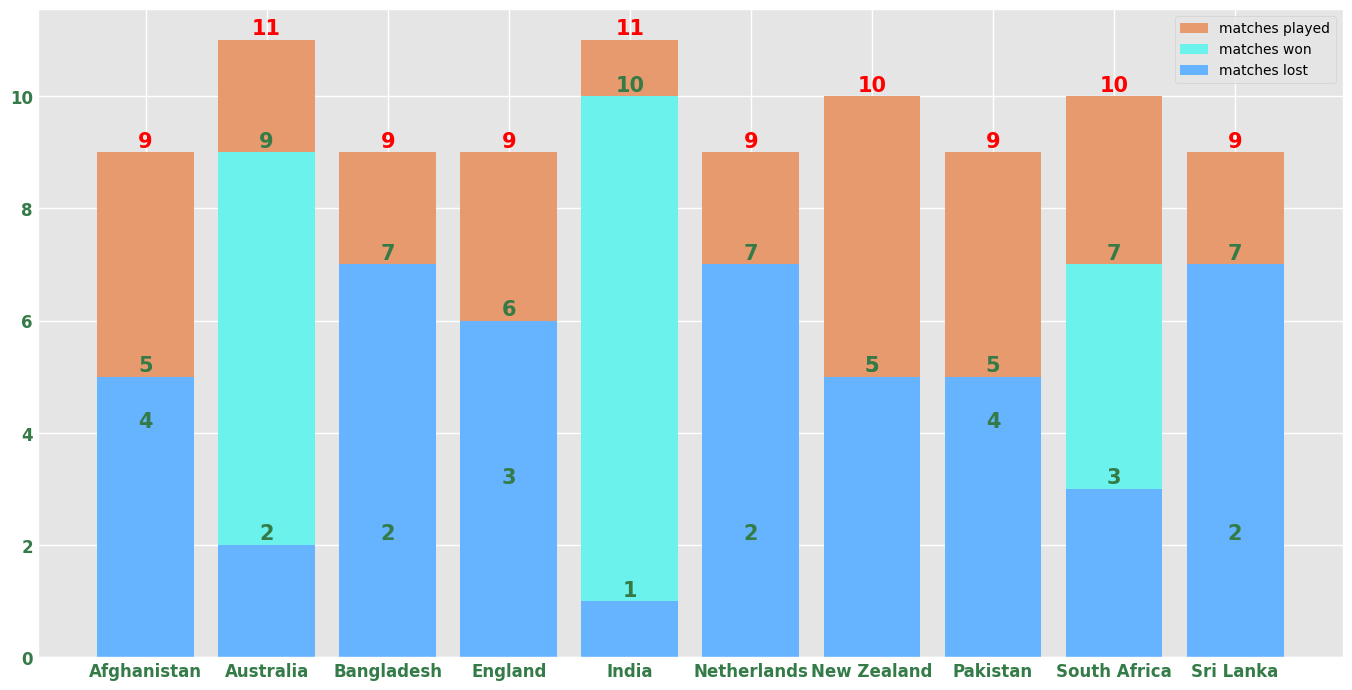

In [ ]:
#showing total matches played,won,lost by each team using visual
plt.figure(figsize=(15,8))
bar1 = plt.bar(merge_lost['team'],merge_lost['total_matches'],color='#E79A6D',label = 'matches played')
bar2 = plt.bar(merge_lost['team'],merge_lost['count'],color = '#6BF2ED',label = 'matches won')
bar3 = plt.bar(merge_lost['team'],merge_lost['lost'],color='#66b3ff',label = 'matches lost')
plt.bar_label(bar1,label_type='edge',padding=1,fontsize=15,color='r',fontweight='bold')
plt.bar_label(bar2,label_type='edge',padding=1,fontsize=15,color='#347B47',fontweight='bold')
plt.bar_label(bar3,label_type='edge',padding=1,fontsize=15,color='#347B47',fontweight='bold')
plt.xticks(fontsize=12,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.legend()
plt.show()

In [ ]:
#score by team
bat_df.groupby('Team_Innings')['Runs'].sum()

Team_Innings
Afghanistan     1990
Australia       2945
Bangladesh      1944
England         2135
India           3038
Netherlands     1728
New Zealand     2712
Pakistan        2220
South Africa    2773
Sri Lanka       1942
Name: Runs, dtype: int64

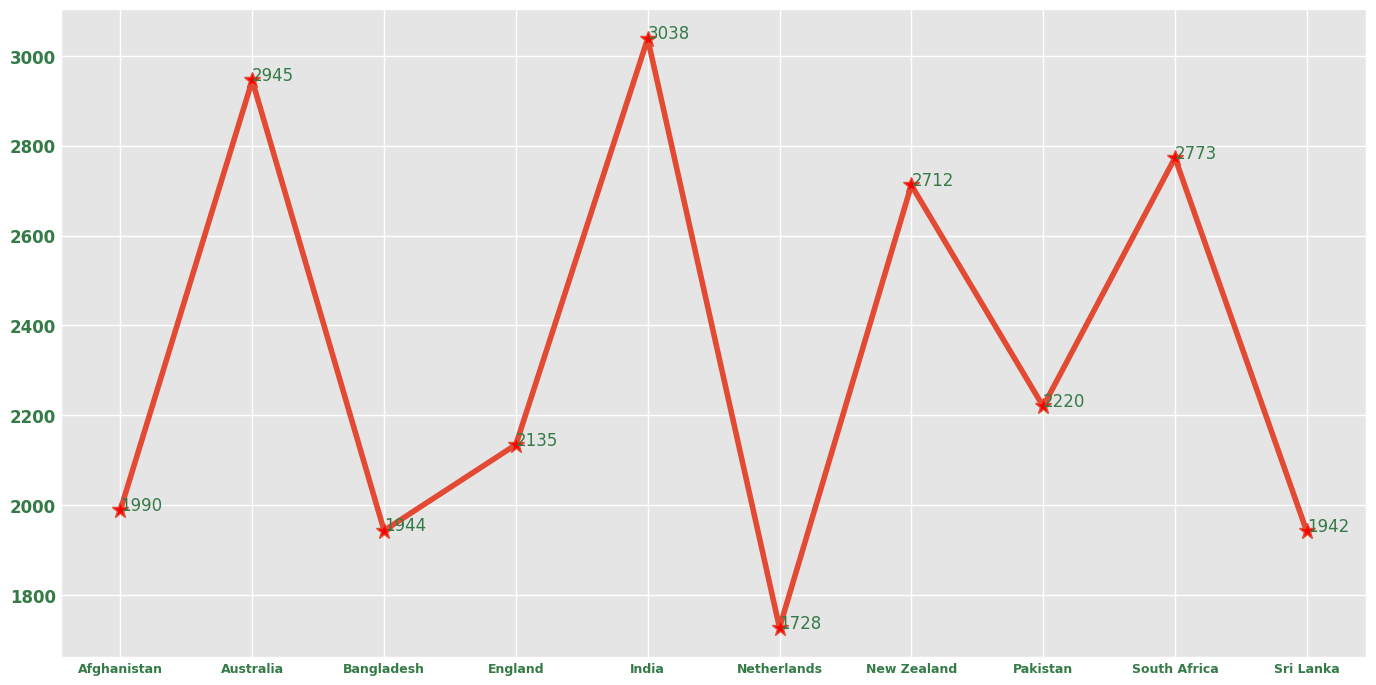

In [ ]:
#score by team using visual
plt.figure(figsize=(15,8))
team_runs = bat_df.groupby('Team_Innings')['Runs'].sum().reset_index()
plt.plot(team_runs['Team_Innings'],team_runs['Runs'],linewidth=4,marker='*',ms=12,mfc='r',label = team_runs['Runs'])
plt.xticks(fontsize=9,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
for index,row in team_runs.iterrows():
  plt.text(index,row['Runs'],str(row['Runs']),color='#347B47',fontsize=12)
plt.show()

In [ ]:
#wickets by team
bowl_df.groupby('Bowling_Team')['Wickets'].sum()

Bowling_Team
Afghanistan     53
Australia       86
Bangladesh      51
England         65
India           99
Netherlands     62
New Zealand     71
Pakistan        65
South Africa    88
Sri Lanka       50
Name: Wickets, dtype: int64

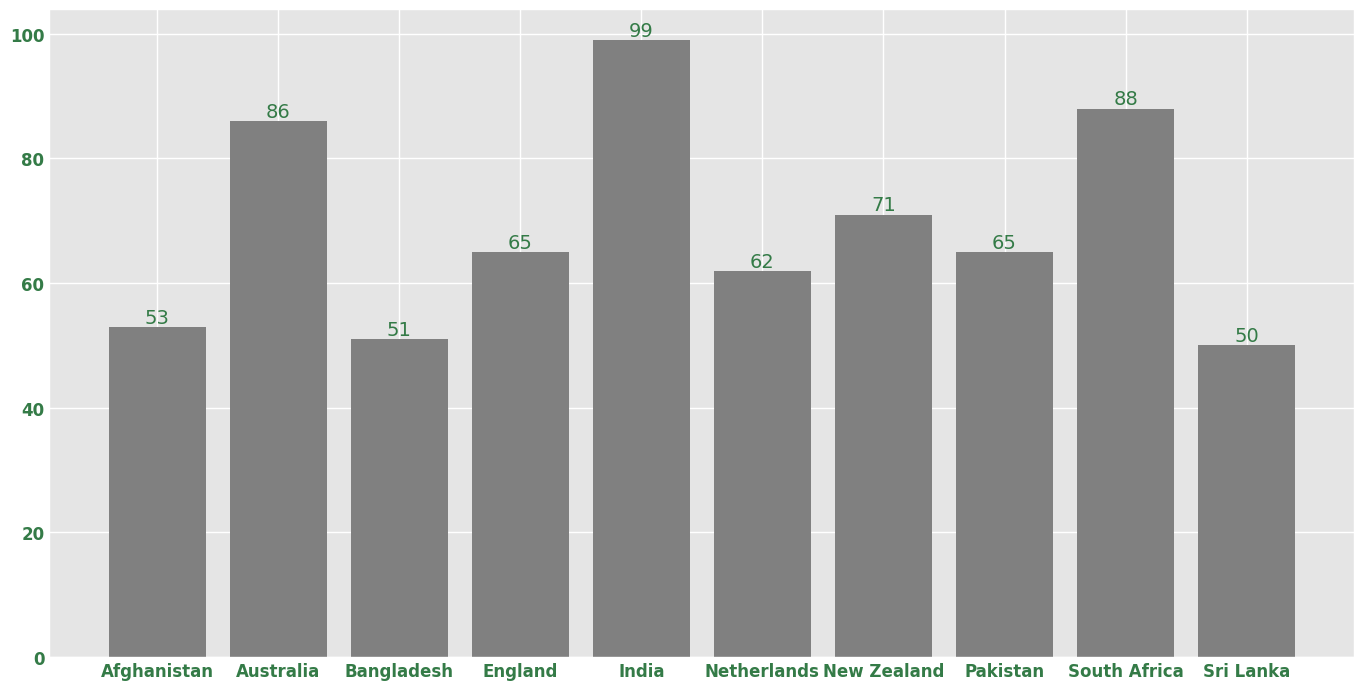

In [ ]:
#wickets by team  using visual
plt.figure(figsize=(15,8))
team_wkts = bowl_df.groupby('Bowling_Team')['Wickets'].sum().reset_index()
bar1=plt.bar(team_wkts['Bowling_Team'],team_wkts['Wickets'],color='#808080')
plt.bar_label(bar1,color='#347B47',fontsize=14)
plt.xticks(fontsize=12,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.show()

In [ ]:
#batting avg for each team
team_dismissal = bat_df[bat_df['out/notout'] == 'out'].groupby('Team_Innings')['out/notout'].count().reset_index()
team_avg = pd.merge(team_runs,team_dismissal,on='Team_Innings',how='left')
team_avg['Average'] = round(team_avg['Runs'] / team_avg['out/notout'],2)
print(team_avg)

   Team_Innings  Runs  out/notout  Average
0   Afghanistan  1990          61    32.62
1     Australia  2945          84    35.06
2    Bangladesh  1944          76    25.58
3       England  2135          86    24.83
4         India  3038          58    52.38
5   Netherlands  1728          88    19.64
6   New Zealand  2712          67    40.48
7      Pakistan  2220          65    34.15
8  South Africa  2773          74    37.47
9     Sri Lanka  1942          77    25.22


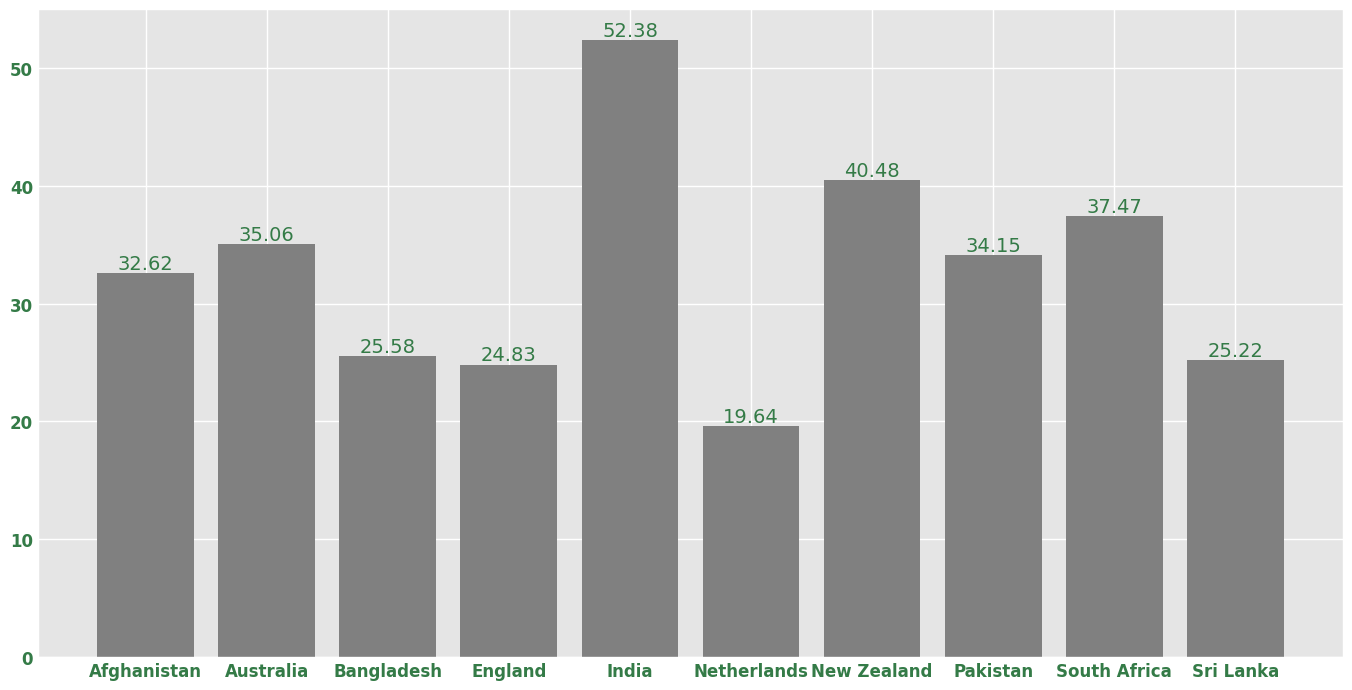

In [ ]:
#batting avg for each team using visual
plt.figure(figsize=(15,8))
bar1 = plt.bar(team_avg['Team_Innings'],team_avg['Average'],color='#808080')
plt.bar_label(bar1,color='#347B47',fontsize=14)
plt.xticks(fontsize=12,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.show()

In [ ]:
#Batting strike rate by each team
team_balls = bat_df.groupby('Team_Innings')['Balls'].sum().reset_index()
team_strike_rate = pd.merge(team_runs,team_balls,on='Team_Innings',how='left')
team_strike_rate['strike_rate'] = round(team_strike_rate['Runs'] / team_strike_rate['Balls'] * 100,2)
print(team_strike_rate)

   Team_Innings  Runs  Balls  strike_rate
0   Afghanistan  1990   2395        83.09
1     Australia  2945   3045        96.72
2    Bangladesh  1944   2459        79.06
3       England  2135   2275        93.85
4         India  3038   2985       101.78
5   Netherlands  1728   2300        75.13
6   New Zealand  2712   2627       103.24
7      Pakistan  2220   2309        96.15
8  South Africa  2773   2790        99.39
9     Sri Lanka  1942   2268        85.63


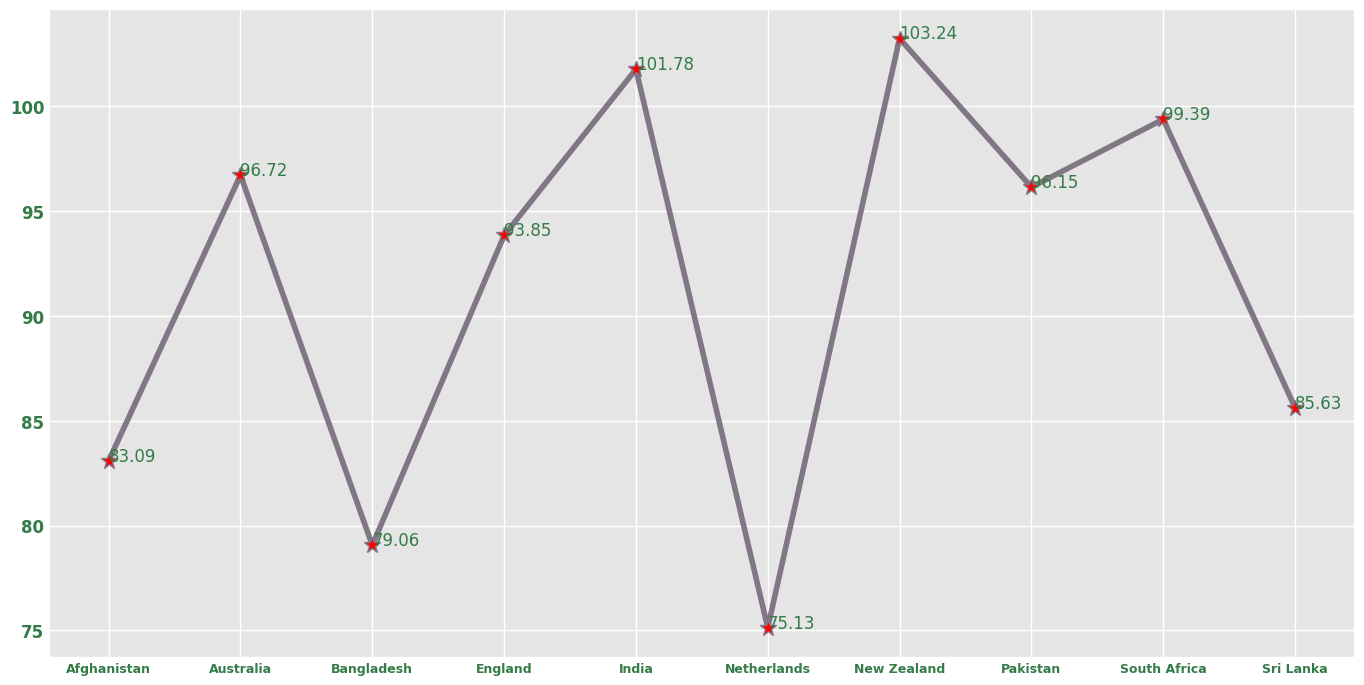

In [ ]:
#Batting strike rate by each team using visualization
plt.figure(figsize=(15,8))
plt.plot(team_strike_rate['Team_Innings'],team_strike_rate['strike_rate'],color='#807684',linewidth=4,marker='*',ms=12,mfc='r',label = team_runs['Runs'])
plt.xticks(fontsize=9,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
for index,row in team_strike_rate.iterrows():
  plt.text(index,row['strike_rate'],str(row['strike_rate']),color='#347B47',fontsize=12)
plt.show()
plt.show()

In [ ]:
#bowling average  by each team
team_runs_given = bowl_df.groupby('Bowling_Team')['Runs'].sum().reset_index()
team_bowl_avg = pd.merge(team_wkts,team_runs_given,on='Bowling_Team',how = 'left')
team_bowl_avg['Average'] = round(team_bowl_avg['Runs'] / team_bowl_avg['Wickets'],2)
print(team_bowl_avg)

   Bowling_Team  Wickets  Runs  Average
0   Afghanistan       53  2144    40.45
1     Australia       86  2749    31.97
2    Bangladesh       51  2414    47.33
3       England       65  2261    34.78
4         India       99  2220    22.42
5   Netherlands       62  2527    40.76
6   New Zealand       71  2664    37.52
7      Pakistan       65  2566    39.48
8  South Africa       88  2324    26.41
9     Sri Lanka       50  2424    48.48


In [ ]:
#bowling strike rate by each tem
team_bowl_strike_rate = bowl_df.groupby('Bowling_Team')['Balls'].sum().reset_index()
merge_strike_rate = pd.merge(team_wkts,team_bowl_strike_rate,on='Bowling_Team',how='left')
merge_strike_rate['strike_rate'] = round(merge_strike_rate['Balls'] / merge_strike_rate['Wickets'],2)
print(merge_strike_rate)

   Bowling_Team  Wickets   Balls  strike_rate
0   Afghanistan       53  2394.6        45.18
1     Australia       86  2989.8        34.77
2    Bangladesh       51  2382.0        46.71
3       England       65  2332.2        35.88
4         India       99  2768.4        27.96
5   Netherlands       62  2479.2        39.99
6   New Zealand       71  2695.2        37.96
7      Pakistan       65  2475.6        38.09
8  South Africa       88  2547.0        28.94
9     Sri Lanka       50  2253.0        45.06


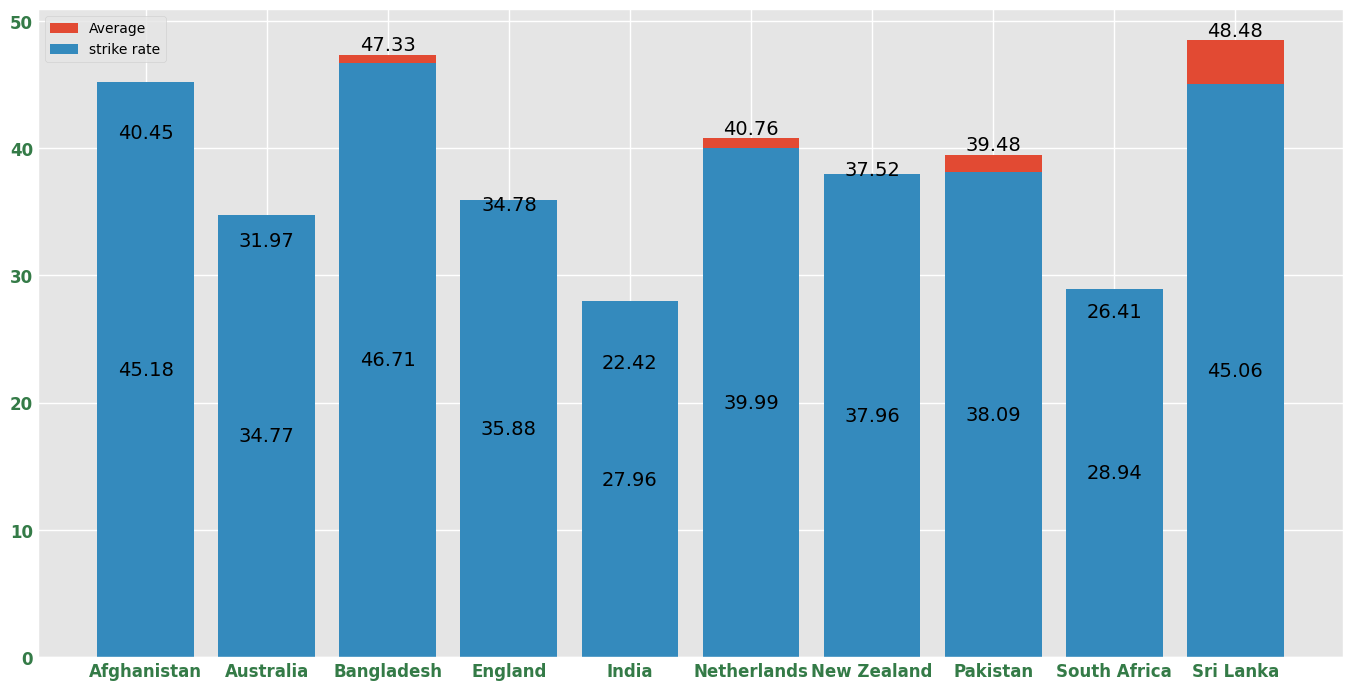

In [ ]:
#average and strike by teams
plt.figure(figsize=(15,8))
bar2 = plt.bar(team_bowl_avg['Bowling_Team'],team_bowl_avg['Average'],label='Average')
bar1 = plt.bar(merge_strike_rate['Bowling_Team'],merge_strike_rate['strike_rate'],label = 'strike rate')
plt.bar_label(bar2,color='black',fontsize=14,label_type = 'edge')
plt.bar_label(bar1,color='black',fontsize=14,label_type = 'center')
plt.xticks(fontsize=12,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.legend()
plt.show()

In [ ]:
#100s by each team
bat_df[bat_df['Runs'] >= 100].groupby('Team_Innings')['Runs'].count()

Team_Innings
Afghanistan     1
Australia       8
Bangladesh      1
England         2
India           7
New Zealand     6
Pakistan        3
South Africa    9
Sri Lanka       3
Name: Runs, dtype: int64

In [ ]:
#50s by each team
bat_df[(bat_df['Runs'] >= 50)  & (bat_df['Runs'] < 100)].groupby('Team_Innings')['Runs'].count()

Team_Innings
Afghanistan     13
Australia       10
Bangladesh      11
England         11
India           18
Netherlands      9
New Zealand     14
Pakistan        13
South Africa     9
Sri Lanka       11
Name: Runs, dtype: int64

In [ ]:
#matches played in venue
match_df['Venue'].value_counts()

Venue
Ahmedabad                                                   5
Delhi                                                       5
Chennai                                                     5
Ekana Cricket Stadium Lucknow                               5
Pune                                                        5
Bengaluru                                                   5
Mumbai                                                      5
Kolkata                                                     5
Dharamsala                                                  4
Hyderabad                                                   3
Himachal Pradesh Cricket Association Stadium, Dharamsala    1
Name: count, dtype: int64

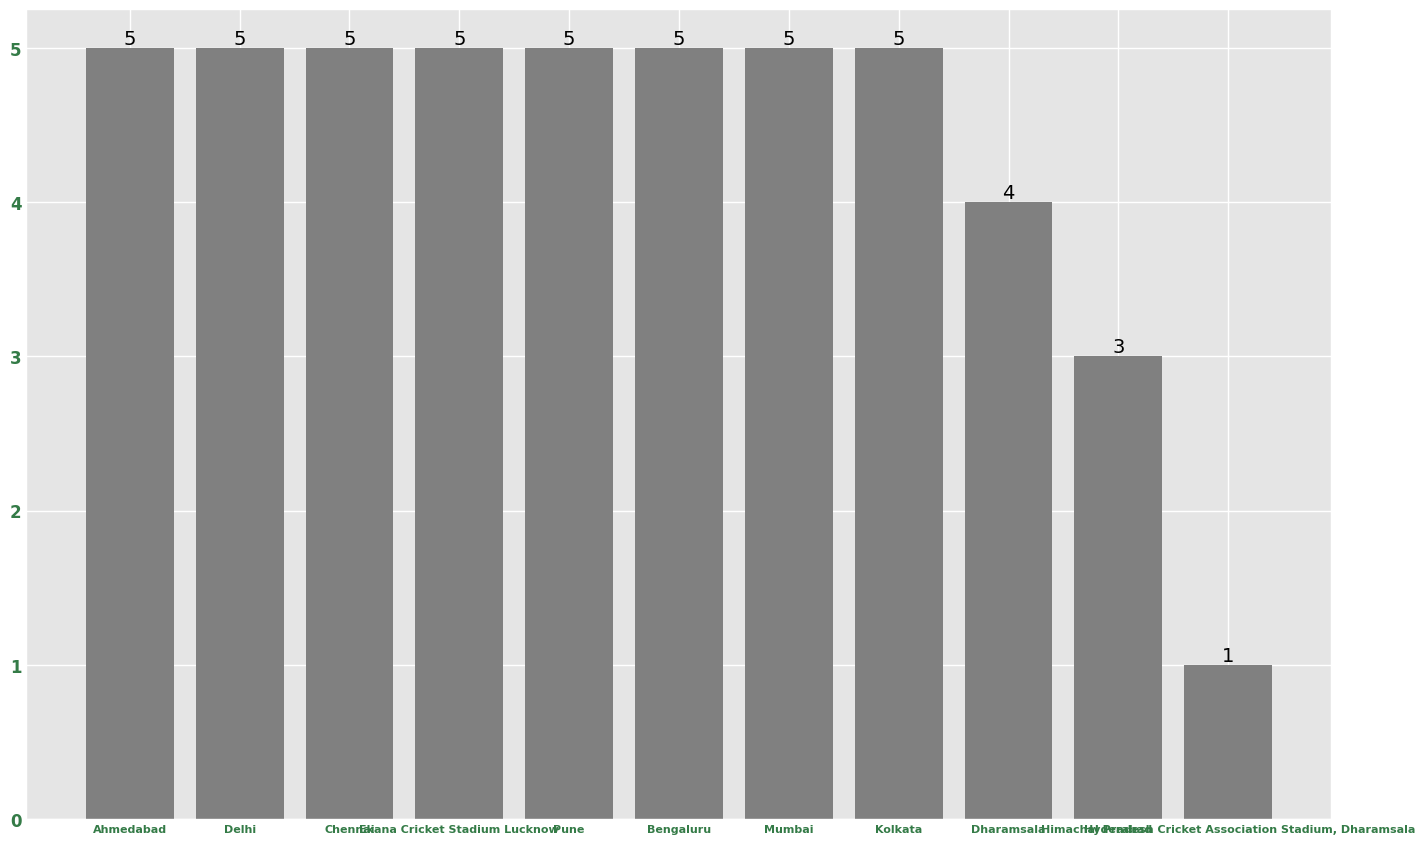

In [ ]:
#matches played in venue using visual
venue_count = match_df['Venue'].value_counts().reset_index()
plt.figure(figsize=(15,10))
bar1 = plt.bar(venue_count['Venue'],venue_count['count'],color = '#808080')
plt.bar_label(bar1,color='black',fontsize=14,label_type = 'edge')
plt.xticks(fontsize=8,color='#347B47',fontweight='bold')
plt.yticks(fontsize=12,color='#347B47',fontweight = 'bold')
plt.show()